<a href="https://colab.research.google.com/github/Phassakorn512/CS240-termproject/blob/main/termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member**
นายพัศกร สงวนเชื้อ 6709616723
* มีหน้าที่ วางแผน Timeline ประสานงาน ตรวจ notebook รวมไฟล์ และตรวจความพร้อมก่อนส่ง

นางสาวณัฐณิชา จุลโพธิ์ 6709540063
* มีหน้าที่กำหนด Problem framing และบอกจุดประสงค์ของหัวข้อที่ต้องการจะค้นคว้า

นายกฤษณะพล บุญเรือง 6709681057
* มีหน้าที่บอกรายละเอียด Data Acquisition

นายภูจิร ยังเหลือ 6709616806
* มีหน้าที่วิเคราะห์ข้อมูลเชิงสํารวจ (EDA) เพื่อค้นหา insights เเละ สร้างกราฟ



# **Problem Framing**

**คุณภาพการนอน (sleep quality) ความสัมพันธ์ต่ออัตราความเครียดที่เพิ่มขึ้น-ลดลง อย่างไร?**

หัวข้อนี้มุ่งศึกษาและทำความเข้าใจว่า การนอนหลับที่ดีหรือไม่ดี มีผลต่อ ระดับความเครียดของเราอย่างไร?

สันนิษฐาน ดังนี้:
*   นอนหลับดี (คุณภาพการนอนสูง) → ความเครียดลดลงเป็นส่วนใหญ่
*   นอนหลับไม่ดี (คุณภาพการนอนต่ำ) → ความเครียดเพิ่มขึ้นเป็นส่วนใหญ่

---

**ปัจจัยที่เกี่ยวข้อง:**

*   ชั่วโมงการนอนและความเพียงพอ
*   คุณภาพของการนอน เช่น นอนลึกหรือตื่นกลางคืนบ่อย
* สุขภาพร่างกายและจิตใจ
* พฤติกรรมและสิ่งแวดล้อม เช่น กิจกรรมก่อนนอน ความเครียดจากงานหรือเรียน

---

**วัตถุประสงค์ของการวิเคราะห์:**

* ศึกษาความสัมพันธ์ระหว่างคุณภาพการนอนกับระดับความเครียด
* หาปัจจัยที่มีผลต่อการนอนหลับที่ดี เพื่อพัฒนาสุขภาพกายและใจ
* ให้คำแนะนำหรือแนวทางในการปรับปรุง sleep quality เพื่อลดความเครียดในชีวิตประจำวัน

---

**ความสำคัญของปัญหา:**
* การนอนหลับเป็นกิจกรรมพื้นฐานที่มนุษย์ทำทุกวัน
* คุณภาพการนอนที่ดีมีผลต่อ ร่างกาย (ฟื้นฟูกล้ามเนื้อ ระบบภูมิคุ้มกัน) และ จิตใจ (ลดความเครียด เพิ่มสมาธิ)
* การนอนไม่เพียงพอหรือคุณภาพไม่ดีส่งผลเสียต่อชีวิตประจำวัน เช่น การเรียน การทำงาน และสุขภาพจิต
* การทำความเข้าใจความสัมพันธ์นี้ช่วยให้คนทั่วไปปรับปรุงการนอน เพื่อชีวิตที่มีคุณภาพและลดความเครียด

---

**แหล่งอ้างอิง:**
https://www.kaggle.com/datasets/sidraaazam/analyzing-student-stress-factors



In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sidraaazam/analyzing-student-stress-factors")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sidraaazam/analyzing-student-stress-factors/versions/1


In [25]:
# Load libraries
import pandas as pd # DataFrame
import seaborn as sb # graph
import matplotlib.pyplot as plt # Plot
from sklearn.preprocessing import MinMaxScaler #scaling

In [26]:
import os

os.listdir(path)

['Student Stress Factors (2).csv']

# Data Acquisition

In [27]:

df = pd.read_csv(path + "/Student Stress Factors (2).csv")

df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


**ข้อมูลคุณลักษณะ**

* Kindly Rate your Sleep Quality 😴: คุณภาพการนอน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* How many times a week do you suffer headaches 🤕: ความถี่ของการปวดศีรษะ ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate you academic performance 👩‍🎓: ระดับผลการเรียน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* how would you rate your study load?: ระดับภาระการเรียน ของนักเรียน [ระดับคะแนน: 1 (เบาที่สุด) ถึง 5 (หนักที่สุด)]

* How many times a week you practice extracurricular activities 🎾: ความถี่ของการทำกิจกรรมนอกหลักสูตร ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate your stress levels?: ระดับความเครียด ของนักเรียน [ระดับคะแนน: 1 (น้อยที่สุด) ถึง 5 (มากที่สุด)]

#Data Preparation

Data Cleaning



1.หาค่าตัวที่ซ้ำกัน

In [29]:
print(f"จำนวนแถวก่อนลบ: {len(df)}")

จำนวนแถวก่อนลบ: 520


In [30]:
duplicate_rows = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำซ้อน: {duplicate_rows}")

จำนวนแถวที่ซ้ำซ้อน: 416


ข้อมูลซ้ำกันเป็นเพราะ ข้อมูลชุดนี้แสดงผลเป็นตัวเลข

In [31]:
df.duplicated()#หาจำนวน ตัวซ้ำ duplicate ถ้าซ้ำจะแสดงเป็น true


,0
0,False
1,False
2,False
3,False
4,False
...,...
515,True
516,True
517,True
518,True


In [32]:
print(df.isnull().sum()) #หาmissingdate

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64


In [33]:
#หา outlier
Q1 = df.quantile(0.25)#หาq1
Q3 = df.quantile(0.75)#หาq1

IQR = Q3-Q1 #หาพิสัยระหว่างquantile
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
#หาค่านอกเกณฑ์ทางลบ
print(lower_bound)

Kindly Rate your Sleep Quality 😴                                   -1.0
How many times a week do you suffer headaches 🤕?                   -2.0
How would you rate you academic performance 👩‍🎓?                    1.5
how would you rate your study load?                                -1.0
How many times a week you practice extracurricular activities 🎾?   -3.5
How would you rate your stress levels?                             -1.0
dtype: float64


In [35]:
print("Kindly Rate your Sleep Quality 😴",(df["Kindly Rate your Sleep Quality 😴"]<-1.0).sum()) #
print("How many times a week do you suffer headaches 🤕?",(df["How many times a week do you suffer headaches 🤕?"]<-2.0).sum())
print("How would you rate you academic performance 👩‍🎓?",(df["How would you rate you academic performance 👩‍🎓?"]<1.5).sum())
print("how would you rate your study load?",(df["how would you rate your study load?"]<1.0).sum())
print("How many times a week you practice extracurricular activities 🎾?",(df["How many times a week you practice extracurricular activities 🎾?"]<-3.5).sum())
print("How would you rate your stress levels?",(df["How would you rate your stress levels?"]<-1.0).sum())

Kindly Rate your Sleep Quality 😴 0
How many times a week do you suffer headaches 🤕? 0
How would you rate you academic performance 👩‍🎓? 35
how would you rate your study load? 0
How many times a week you practice extracurricular activities 🎾? 0
How would you rate your stress levels? 0


In [36]:
#หาค่านอกเกณฑ์ทางบวก
print(upper_bound)

Kindly Rate your Sleep Quality 😴                                    7.0
How many times a week do you suffer headaches 🤕?                    6.0
How would you rate you academic performance 👩‍🎓?                    5.5
how would you rate your study load?                                 7.0
How many times a week you practice extracurricular activities 🎾?    8.5
How would you rate your stress levels?                              7.0
dtype: float64


In [37]:
print("Kindly Rate your Sleep Quality 😴",(df["Kindly Rate your Sleep Quality 😴"]>7.0).sum()) #
print("How many times a week do you suffer headaches 🤕?",(df["How many times a week do you suffer headaches 🤕?"]>6.0).sum())
print("How would you rate you academic performance 👩‍🎓?",(df["How would you rate you academic performance 👩‍🎓?"]>5.5).sum())
print("how would you rate your study load?",(df["how would you rate your study load?"]>7.0).sum())
print("How many times a week you practice extracurricular activities 🎾?",(df["How many times a week you practice extracurricular activities 🎾?"]>8.5).sum())
print("How would you rate your stress levels?",(df["How would you rate your stress levels?"]>7.0).sum())

Kindly Rate your Sleep Quality 😴 0
How many times a week do you suffer headaches 🤕? 0
How would you rate you academic performance 👩‍🎓? 0
how would you rate your study load? 0
How many times a week you practice extracurricular activities 🎾? 0
How would you rate your stress levels? 0


In [38]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Kindly Rate your Sleep Quality 😴                                     0
How many times a week do you suffer headaches 🤕?                     0
How would you rate you academic performance 👩‍🎓?                    35
how would you rate your study load?                                  0
How many times a week you practice extracurricular activities 🎾?     0
How would you rate your stress levels?                               0
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


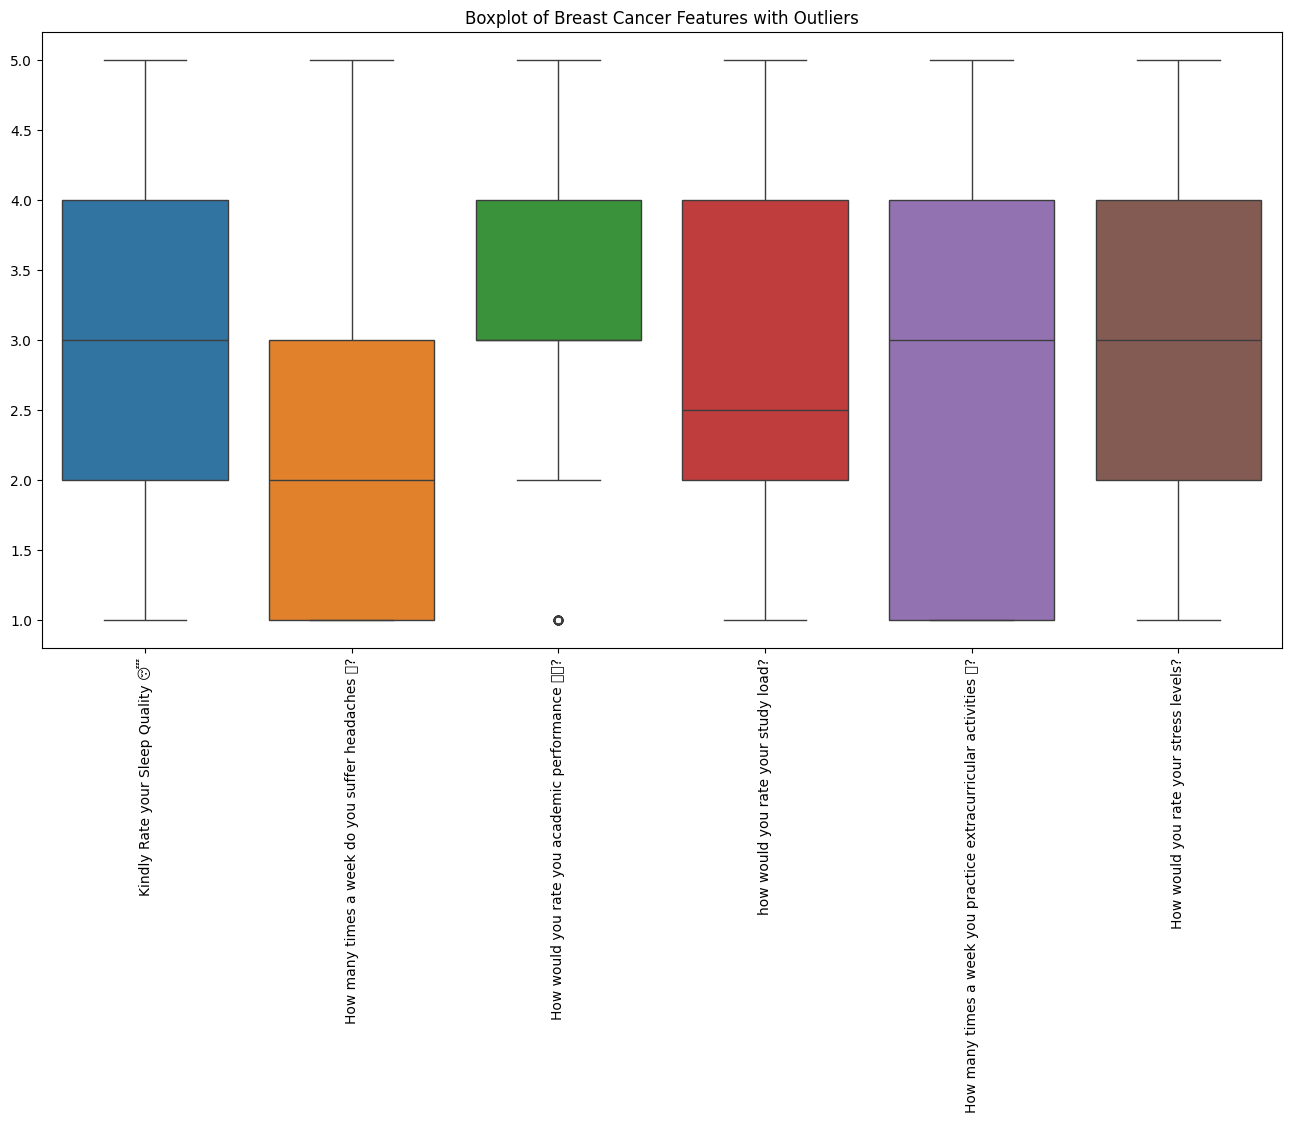

In [39]:
# ทำแผนภาพกล่อง

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Breast Cancer Features with Outliers')
plt.show()

#EDA

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu San

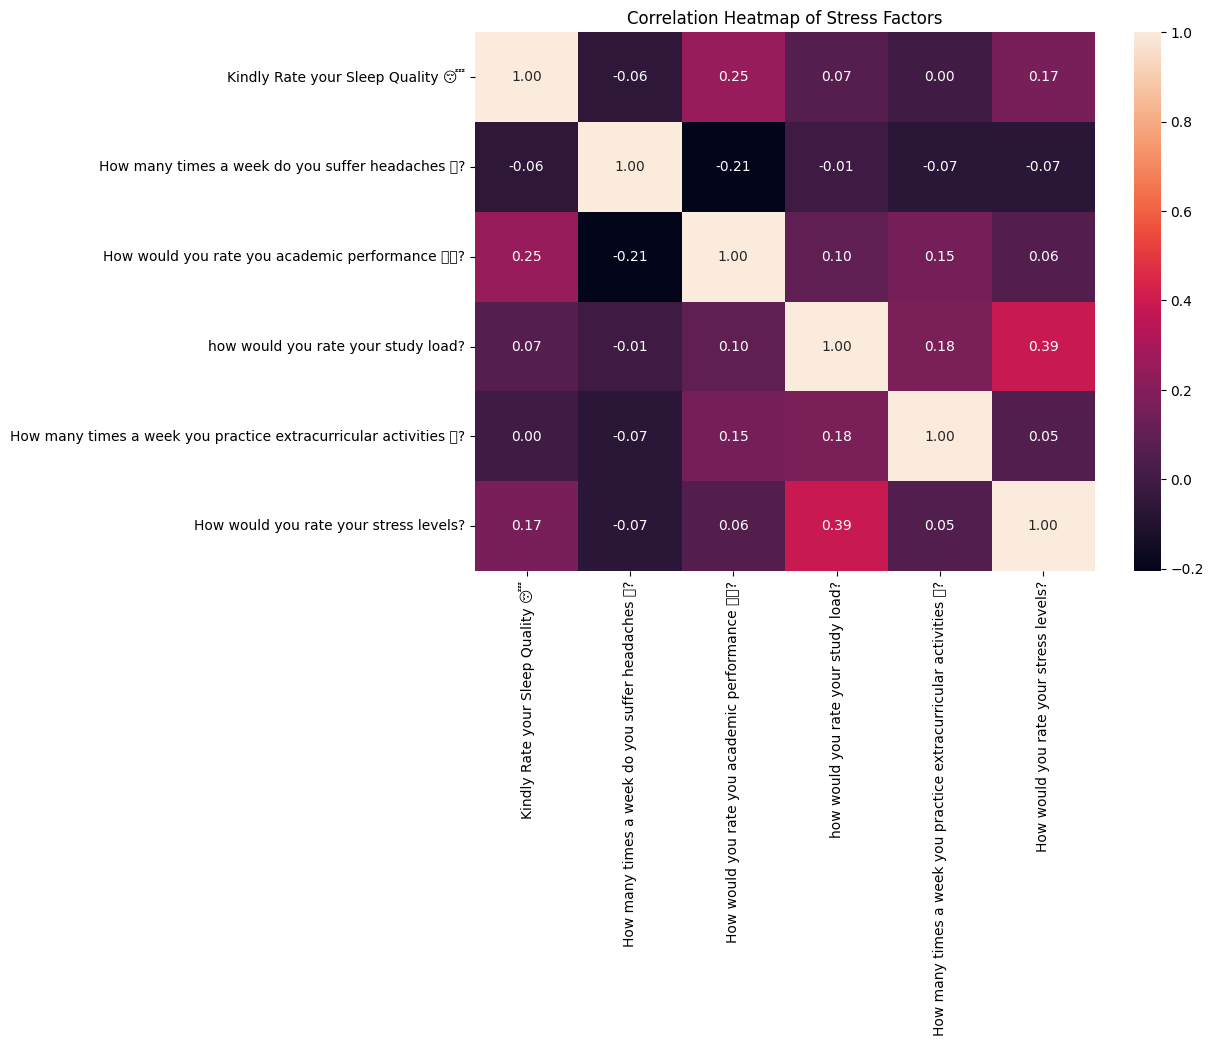

In [40]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sb.heatmap(corr, annot=True , fmt='.2f')
plt.title('Correlation Heatmap of Stress Factors')
plt.show()

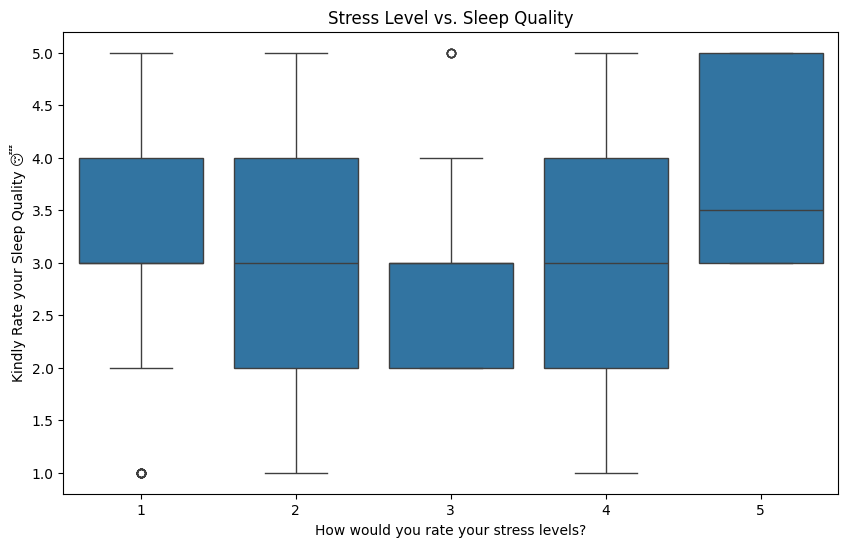

In [41]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='How would you rate your stress levels?', y='Kindly Rate your Sleep Quality 😴', data=df)
plt.title('Stress Level vs. Sleep Quality')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


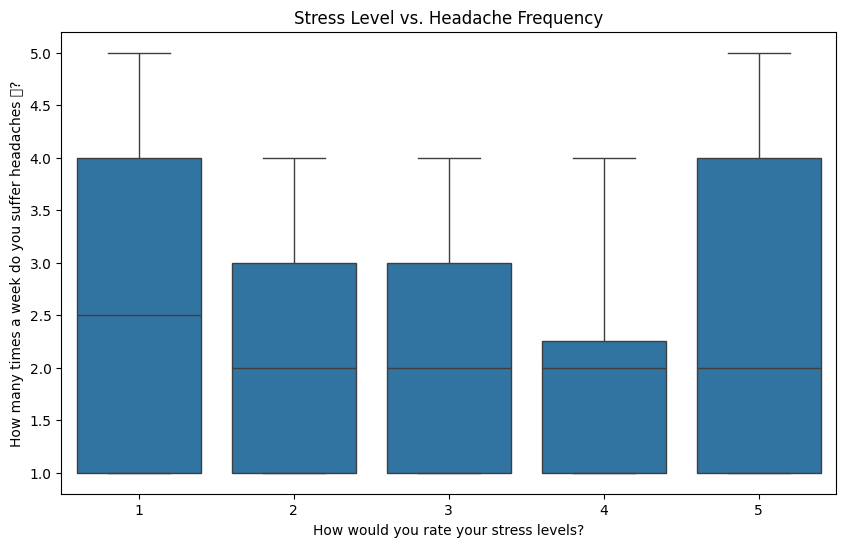

In [42]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="How would you rate your stress levels?", y="How many times a week do you suffer headaches 🤕?", data=df)
plt.title('Stress Level vs. Headache Frequency')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


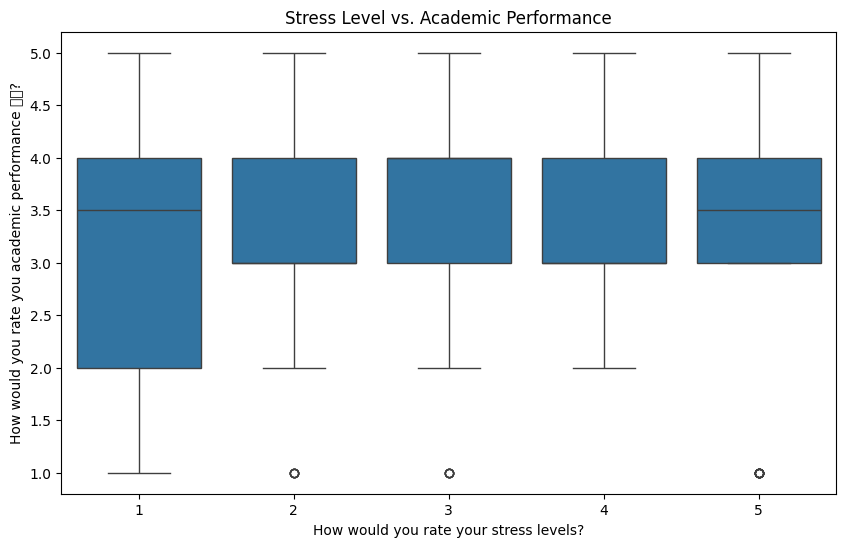

In [43]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="How would you rate your stress levels?", y="How would you rate you academic performance 👩‍🎓?", data=df)
plt.title('Stress Level vs. Academic Performance')
plt.show()

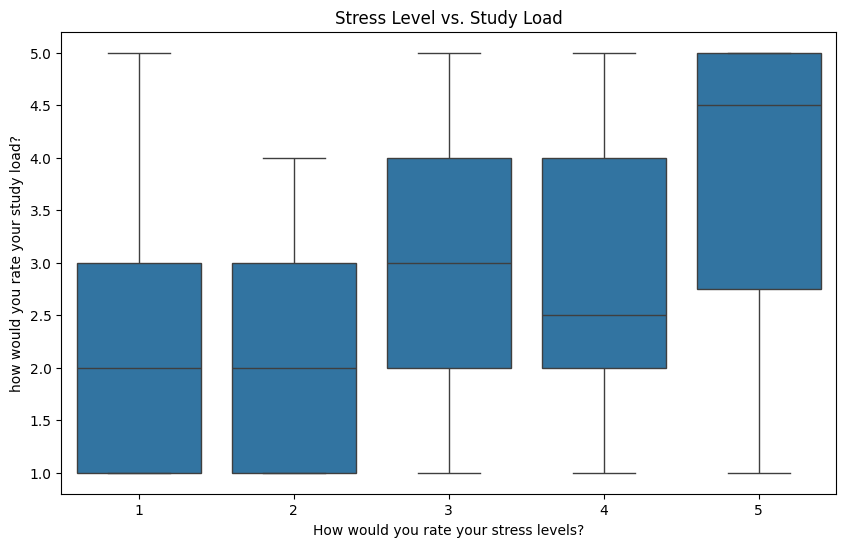

In [44]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="How would you rate your stress levels?", y="how would you rate your study load?", data=df)
plt.title('Stress Level vs. Study Load')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


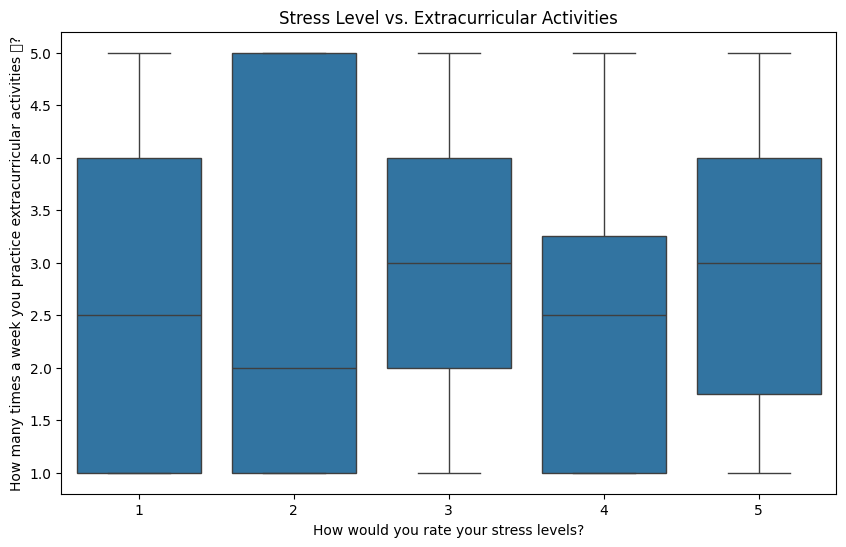

In [45]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="How would you rate your stress levels?", y="How many times a week you practice extracurricular activities 🎾?", data=df)
plt.title('Stress Level vs. Extracurricular Activities')
plt.show()

#Model Planning

#Model Building

Evalutate

#Visualization